In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
import numpy as np

Image size: (800, 1200)


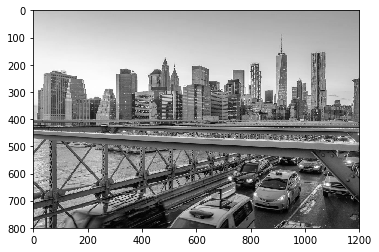

In [4]:
img = np.array(Image.open("nyc.jpeg").convert('L'))
plt.imshow(img, cmap='gray')
print('Image size:', img.shape)

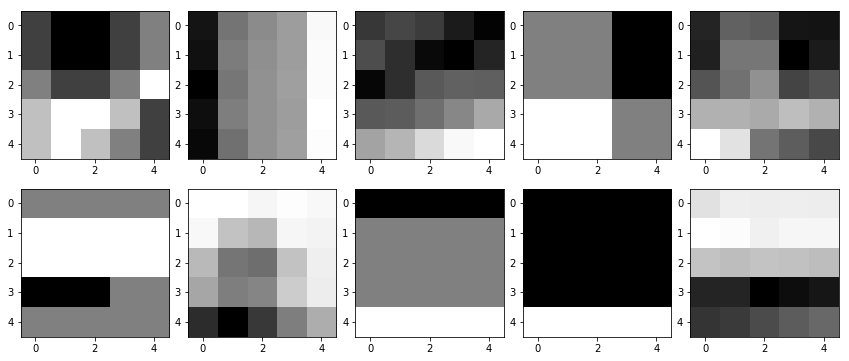

In [3]:
# Extract all patches of size 5x5 from the image

patches = extract_patches_2d(img, (5, 5))
# print(patches.shape) ## There are around 900,000 patches, you can see by uncommenting this line

# Let's select some at random to show
rand_patches_idx = np.random.randint(low=0, high=patches.shape[0], size=10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(patches[rand_patches_idx[i], :, :], cmap='gray') #contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)

# Now let's reshape the data for the next step    
patches = np.reshape(patches, (patches.shape[0], 25))
# print(patches.shape)

In [4]:
# Let's reduce the dimension of the data from 25 to 3, so we can show in a plot
pca = PCA(n_components=3)
planar_view = pca.fit_transform(patches)

# Also, let's make sure the numbers are between 0 and 1, so we can compare them below
scalar = MinMaxScaler((0, 1))
planar_view = scalar.fit_transform(planar_view)

Text(0.5, 0.92, 'Random patches')

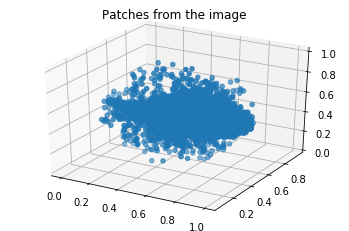

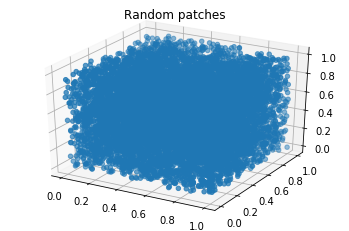

In [5]:
# Choose 10,000 random points and plot them in the 3D view
idx = np.random.randint(low=0, high=planar_view.shape[0], size=10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(planar_view[idx, 0], planar_view[idx, 1], planar_view[idx, 2])
ax.set_title('Patches from the image')

# Now let's plot 10,000 random points in the same 0 to 1 scale and see how they are distributed
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.rand(10000), np.random.rand(10000), np.random.rand(10000))
ax.set_title('Random patches')

 - As we can see above, a random distribution of points basically fills all this space. On the other hand, randomly selected patches from a natural image are clearly concentrated in some regions of the space.
 
 - The goal of this short example is to show that not all possible patches occur with the same frequency in images, which is one of the reasons why convolutional neural networks are such a success.